# Genrating Images
In this notebook, we will use a trained GAN to generate an experimental image from simulated data.

In [1]:
import tensorflow as tf
from models import unet_generator
from generate_image import generate_image, GAN_image_folder

In [2]:
parent_dir = "D:/stem-learning/"
sim_dir = parent_dir + "data/WSe/data_for_gan/simulation/sim_pristine_normalized/"

fine_size, stride = 256, 256
num_channels=1

identifier_list =  ["20220520_unet_dist_gen_fft_10_pristine"
                    ]

identifier = identifier_list[-1]


In [3]:
generator_exp = unet_generator(num_channels, 1, "instancenorm")
generator_sim = unet_generator(1, num_channels, "instancenorm")

In [4]:
checkpoint_path = parent_dir + "cycle_gan_results/checkpoints/checkpoint_{}".format(identifier)
log_data_fn = "{}/data_{}.p".format(checkpoint_path, identifier)

ckpt = tf.train.Checkpoint(generator_exp=generator_exp,
                           generator_sim=generator_sim)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    #cpath = ckpt_manager.checkpoints[-2]
    cpath = ckpt_manager.latest_checkpoint
    print("loading checkpoint ", cpath)
    ckpt.restore(cpath)
    print ('Latest checkpoint restored!')

loading checkpoint  D:/stem-learning/cycle_gan_results/checkpoints/checkpoint_20220520_unet_dist_gen_fft_10_pristine\ckpt-29
Latest checkpoint restored!


In [5]:
model = generator_exp
input_file = sim_dir + "sim_images_stack0000.tif"
fine_size = 256
stride= 256
avg=False
plot=True
save_data=True
save_dir=parent_dir
fname='generated_input.tiff'

processing data
loading model
stride: 256
predicting data
stitching data


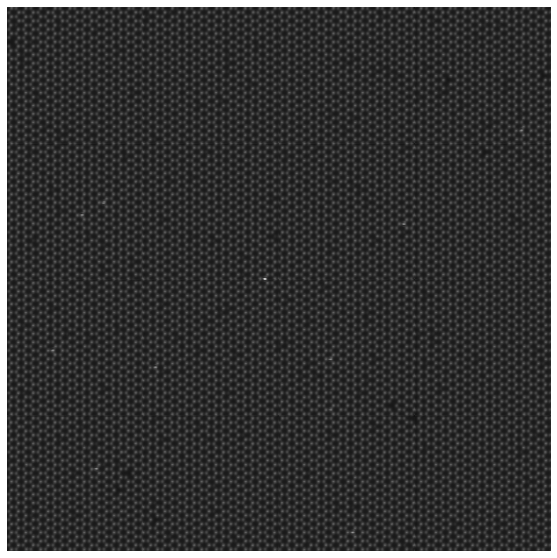

saving data


In [6]:
img = generate_image(model, input_file, fine_size, stride, avg, plot, save_data, save_dir,fname)

If we want to make batch images:

In [8]:
input_dir = sim_dir
save_dir = parent_dir + "data/WSe_ALL/sim_abberation_{}/".format(identifier)
GAN_image_folder(model, input_dir, save_dir, fine_size, stride, avg)

processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitching data
saving data
processing data
loading model
stride: 256
predicting data
stitchi

In [9]:
input_dir

'D:/stem-learning/data/WSe_ALL/sim_abberation_normalized/'